In [231]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import RocCurveDisplay, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [232]:
def init_logistic_regression(x, y):
    return LogisticRegression(max_iter=1000000).fit(x, y)

In [233]:
df = pd.read_csv("./unionMatrix_TreeBasedFeatureSelection_Normalized_class.csv")
Y = np.array(df[["label"]]).ravel()
X = df.drop(["label", "sample_ID"], axis = 1)

In [234]:
ill1 = df[df.label.isin([0, 1])]
ill2 = df[df.label.isin([0, 2])]
ill3 = df[df.label.isin([0, 3])]
ill4 = df[df.label.isin([0, 4])]

In [235]:
print("1", len(df[df.label.isin([1])]))
print("2", len(df[df.label.isin([2])]))
print("3", len(df[df.label.isin([3])]))
print("4", len(df[df.label.isin([4])]))

1 516
2 82
3 41
4 28


In [236]:
x_ill1 = ill1.drop(["label", "sample_ID"], axis = 1)
y_ill1 = np.array(ill1[["label"]]).ravel()
x_ill2 = ill2.drop(["label", "sample_ID"], axis = 1)
y_ill2 = np.array(ill2[["label"]].replace(2,1)).ravel()
x_ill3 = ill3.drop(["label", "sample_ID"], axis = 1)
y_ill3 = np.array(ill3[["label"]].replace(3,1)).ravel()
x_ill4 = ill4.drop(["label", "sample_ID"], axis = 1)
y_ill4 = np.array(ill4[["label"]].replace(4,1)).ravel()
illSplit = [[x_ill1, y_ill1], [x_ill2, y_ill2], [x_ill3, y_ill3], [x_ill4, y_ill4]]

1
0.5859649122807018
0.14843462236674393
[[140  16]
 [102  27]]


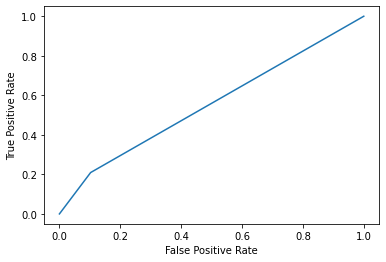

1
0.5298245614035088
-0.015674574005723807
[[135  21]
 [113  16]]


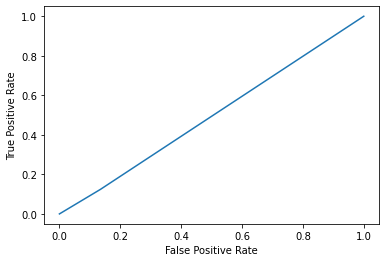

1
0.573943661971831
0.12104220646168323
[[142  13]
 [108  21]]


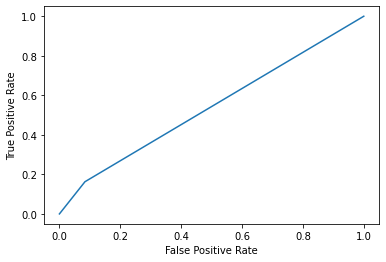

1
0.573943661971831
0.12549632426000643
[[111  44]
 [ 77  52]]


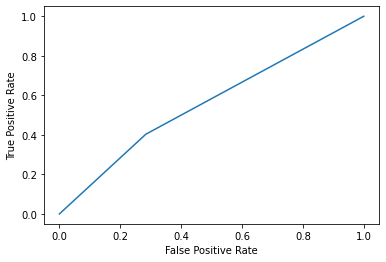

2
0.8806818181818182
-0.027066598098038335
[[155   1]
 [ 20   0]]


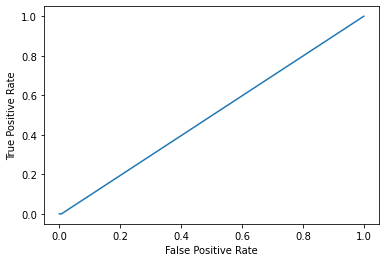

2
0.8863636363636364
0.0
[[156   0]
 [ 20   0]]


C:\Users\Chilli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


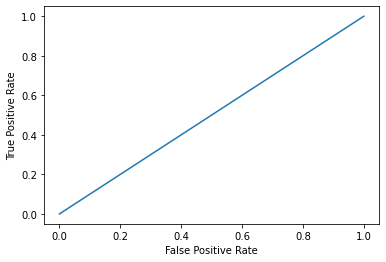

C:\Users\Chilli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


2
0.8806818181818182
0.0
[[155   0]
 [ 21   0]]


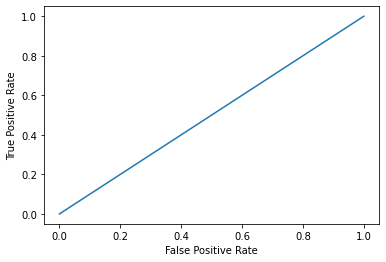

2
0.8806818181818182
0.0


C:\Users\Chilli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[[155   0]
 [ 21   0]]


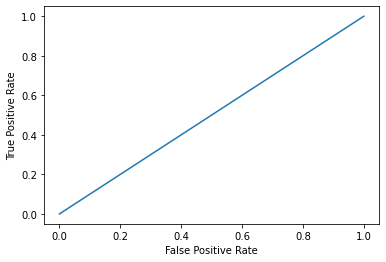

3
0.9397590361445783
0.0
[[156   0]
 [ 10   0]]


C:\Users\Chilli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


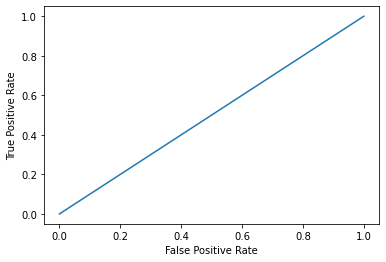

3
0.9397590361445783
0.0
[[156   0]
 [ 10   0]]


C:\Users\Chilli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


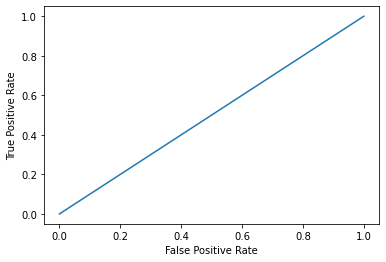

3
0.9337349397590361
0.0
[[155   0]
 [ 11   0]]


C:\Users\Chilli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


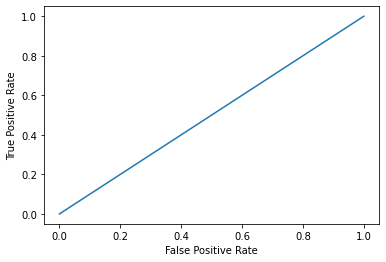

3
0.9393939393939394
0.2902613528793588
[[153   2]
 [  8   2]]


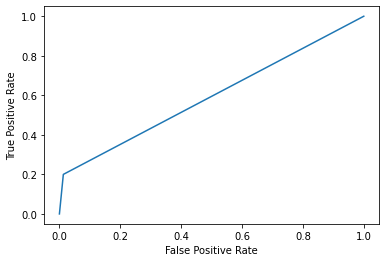

4
0.9570552147239264
0.25127368761726054
[[155   1]
 [  6   1]]


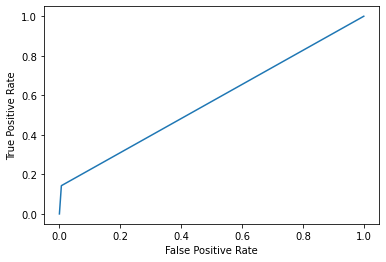

4
0.9570552147239264
0.0
[[156   0]
 [  7   0]]


C:\Users\Chilli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


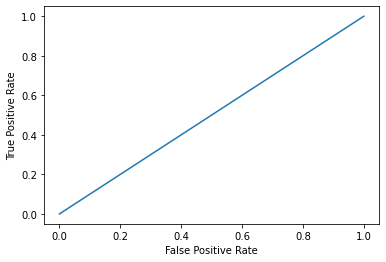

4
0.9629629629629629
0.3708547885348616
[[155   0]
 [  6   1]]


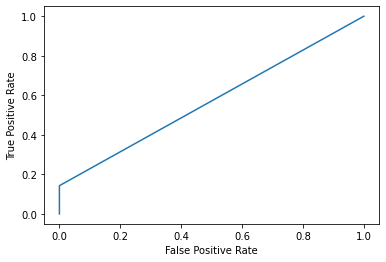

4
0.9444444444444444
-0.023759548165574573
[[153   2]
 [  7   0]]


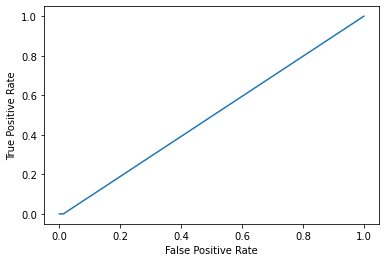

In [237]:
for i, ill in enumerate(illSplit):
    kf = StratifiedKFold(n_splits=4)
    for train, test in kf.split(ill[0], ill[1]):
        x_train = ill[0].iloc[train]
        y_train = ill[1][train]
        x_test = ill[0].iloc[test]
        y_test = ill[1][test]
    #x_train, x_test, y_train, y_test = train_test_split(ill[0], ill[1], test_size=0.25, random_state=0)
        regression = init_logistic_regression(x_train, y_train)
        print(i+1)
        print(regression.score(x_test, y_test))
        print(matthews_corrcoef(y_test, regression.predict(x_test)))
        a,b,c = roc_curve(y_test, regression.predict(x_test))
        display = RocCurveDisplay(fpr=a,tpr=b)
        print(confusion_matrix(y_test, regression.predict(x_test), labels=[0,1]))
        display.plot()
        plt.show()
    #reg = LogisticRegression()
    #print(cross_val_score(reg, ill[0], ill[1], cv=5))